# <center>CS570: Computer Vision</center>  <center>Fall 2021</center> 

Mount your Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook, we will build a neural network model from scratch that is able to distinguish dogs from cats. 

**NOTE:** The 2200 images used in this notebook are excerpted from the ["Dogs vs. Cats"](https://www.kaggle.com/c/dogs-vs-cats/data) dataset available on Kaggle, which contains 25,000 images. We use a subset of the full dataset here.


**CNN in Keras**
In this notebook, we will learn to: 

1. load cats-vs-dogs dataset.
2. define model
3. compile model
4. fit model
 + save model weights every 10 epochs
 + train the model and plot the accuracy or loss at each epoch
5. evaluate model
7. predict the class of a testing image

# **1 Load dataset** 
 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 70, 70

train_data_dir = '/content/drive/My Drive/workshop/final/keras/dataset/dogs-vs-cats/train/'
validation_data_dir = '/content/drive/My Drive/workshop/final/keras/dataset/dogs-vs-cats/val/' 
test_data_dir = '/content/drive/My Drive/workshop/final/keras/dataset/dogs-vs-cats/'

# normalize the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
batch_size = 32 # e.g 4, 8, 16, 32, 64

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        color_mode = 'grayscale',
        classes = ['test'],
        class_mode=None)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


# **2. Define model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

img_width, img_height = 70, 70
input_dim = 70*70
output_dim = 1

def CNN():
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape = (img_width, img_height, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model

# define model
model = CNN()

# **3. Compile model**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compile model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **4. Fit model**

In [ ]:
import os

# print model information
model.summary()

outputFolder = 'weights/'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)

filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, \
                             save_best_only=False, save_weights_only=True, \
                             mode='auto', period=1)
callbacks_list = [checkpoint]

nb_epoch = 10


model_info = model.fit(
        train_generator,
        epochs=nb_epoch,
        batch_size=100,
        validation_data=validation_generator,
        validation_batch_size=100,
        callbacks=callbacks_list)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 500)              

### Plots showing learning curves of model loss and accuracy over each training epoch during training and validation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


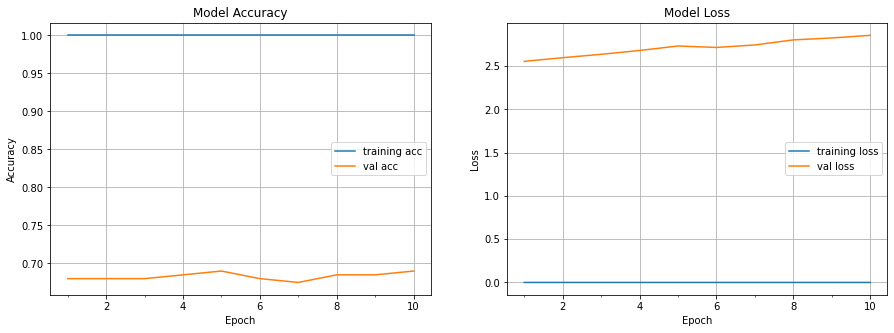

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # model history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['training acc', 'val acc'], loc='best')
    axs[0].grid(True)
    # model history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['training loss', 'val loss'], loc='best')
    axs[1].grid(True)
    plt.show()
plot_model_history(model_info)

# **5. Evaluate model**

In [ ]:
_, training_accuracy = model.evaluate_generator(train_generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print('training accuracy: %.2f' % (training_accuracy*100))

_, validation_accuracy = model.evaluate(validation_generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print('validation accuracy: %.2f' % (validation_accuracy*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


training accuracy: 100.00
validation accuracy: 69.00


# **6. Predict the class**

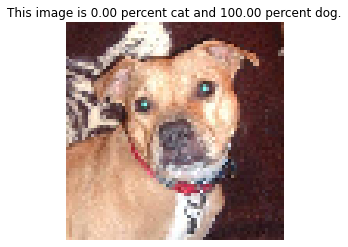

In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

original_img = keras.preprocessing.image.load_img("/content/drive/My Drive/workshop/final/keras/dataset/dogs-vs-cats/test/3.jpg", target_size=(70, 70, 1))
img = keras.preprocessing.image.load_img("/content/drive/My Drive/workshop/final/keras/dataset/dogs-vs-cats/test/3.jpg", color_mode = 'grayscale', target_size=(70, 70, 1))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
score = predictions[0]
fig = plt.figure()
plt.imshow(original_img)
plt.axis("off")
plt.title( "This image is %.2f percent cat and %.2f percent dog." % (100 * (1 - score), 100 * score))   
plt.show()